In [ ]:
import numpy as np
import pandas as pd
import os
import random
from PIL import Image
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Dense, Flatten, GlobalAveragePooling2D
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.optimizers import Adam

2024-05-29 15:42:57.315945: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-29 15:42:57.316065: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-29 15:42:57.477549: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
train_dir = '/kaggle/input/birds-20-species-image-classification/train'
test_dir= '/kaggle/input/birds-20-species-image-classification/test'
val_dir = '/kaggle/input/birds-20-species-image-classification/valid'

In [ ]:
data = ImageDataGenerator(zoom_range=0.2,
                        width_shift_range=0.2,
                        height_shift_range=0.2)

data_val = ImageDataGenerator()

train_dg = data.flow_from_directory(train_dir,
                                    class_mode = "categorical",
                                    target_size = (224, 224),
                                    batch_size = 32,
                                    shuffle = False,
                                    seed = 42)

val_dg = data_val.flow_from_directory(val_dir,
                                      class_mode = "categorical",
                                      target_size = (224, 224),
                                      batch_size = 32,
                                      shuffle = False,
                                      seed = 42)

test_dg = data_val.flow_from_directory(test_dir,
                                      class_mode = "categorical",
                                      target_size = (224, 224),
                                      batch_size = 16,
                                      shuffle = False,
                                      seed = 42)

classes = list(train_dg.class_indices.keys())

Found 3208 images belonging to 20 classes.
Found 100 images belonging to 20 classes.
Found 100 images belonging to 20 classes.


Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)


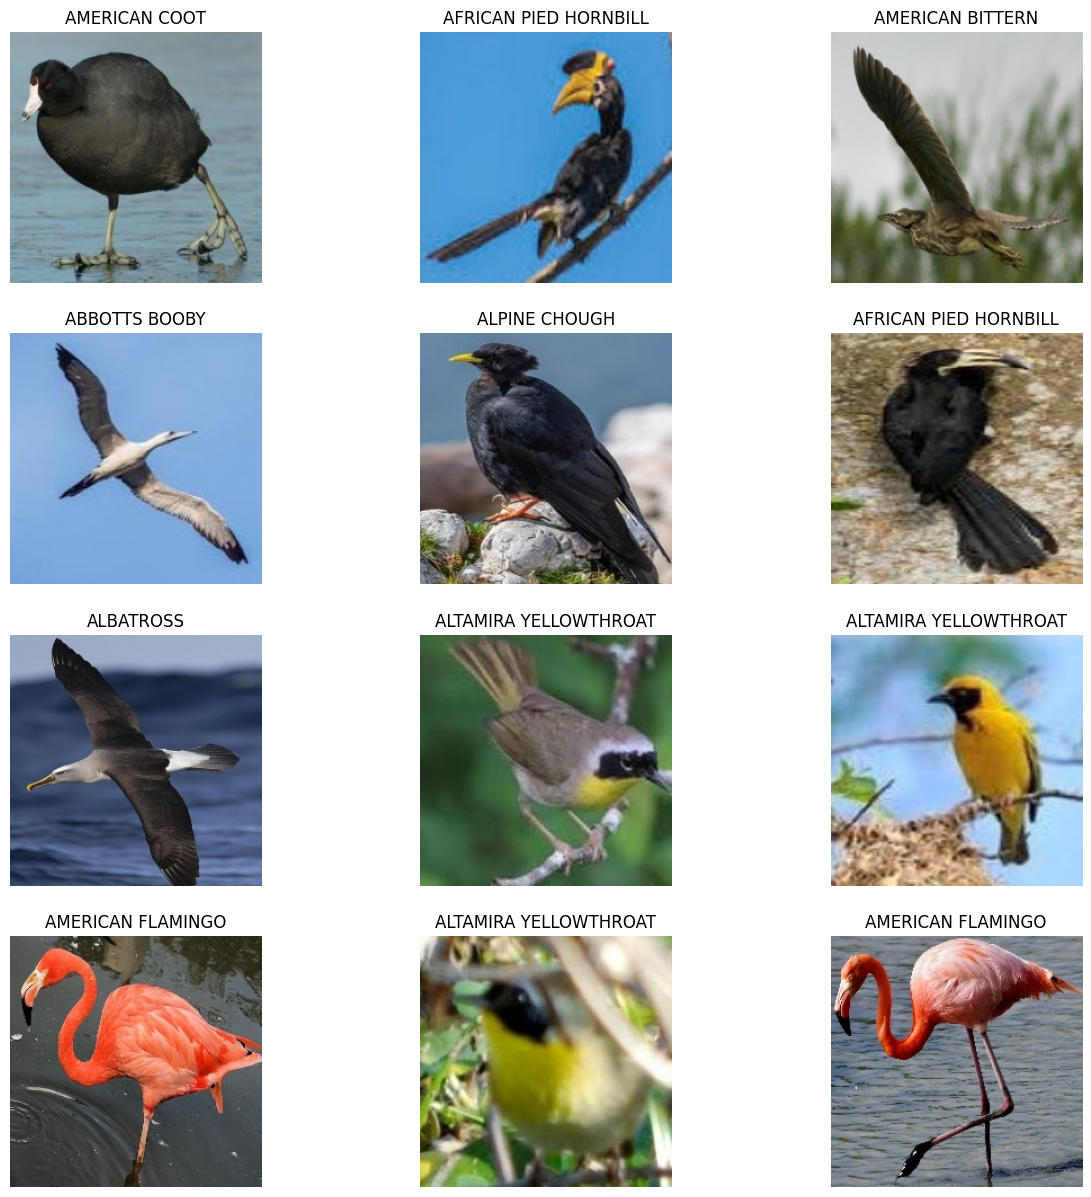

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def bird_image(direct, classes):

    path = direct + "/" + classes

    random_image = random.sample(os.listdir(path),1)

    img = mpimg.imread(path + "/" + random_image[0] )
    plt.imshow(img)
    plt.title(classes)
    plt.axis("off")

    print(f"Image shape: {img.shape}")

def img_view(row, col, bird):

    plt.figure(figsize = (15,15))

    for i in range(1,row*col+1):

        plt.subplot(row,col,i)
        if bird==random:
            bird_image(train_dir,classes[random.randint(0,19)])
        else:
            bird_image(train_dir,bird)


img_view(4, 3, random)

# ResNet50 Model

In [ ]:
from tensorflow.keras.applications import ResNet50

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
  layer.trainable = False

x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(20, activation='softmax')(x)

# Create your custom model
model = keras.Model(inputs=base_model.input, outputs=outputs)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model.compile(optimizer='adam',
              loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [ ]:
history = model.fit(
      train_dg,
      epochs=25,
      validation_data = val_dg)

Epoch 1/25


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  2/101 ━━━━━━━━━━━━━━━━━━━━ 9s 91ms/step - accuracy: 0.0000e+00 - loss: 4.0404  

I0000 00:00:1716997416.197308     132 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1716997416.246181     132 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 80/101 ━━━━━━━━━━━━━━━━━━━━ 12s 601ms/step - accuracy: 0.0322 - loss: 5.3024

W0000 00:00:1716997463.584883     130 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 555ms/step - accuracy: 0.0462 - loss: 5.0861

W0000 00:00:1716997476.154849     132 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


101/101 ━━━━━━━━━━━━━━━━━━━━ 86s 643ms/step - accuracy: 0.0470 - loss: 5.0765 - val_accuracy: 0.4600 - val_loss: 1.7590
Epoch 2/25


W0000 00:00:1716997480.570052     132 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


101/101 ━━━━━━━━━━━━━━━━━━━━ 46s 427ms/step - accuracy: 0.4660 - loss: 1.7403 - val_accuracy: 0.8300 - val_loss: 0.6078
Epoch 3/25
101/101 ━━━━━━━━━━━━━━━━━━━━ 45s 416ms/step - accuracy: 0.7616 - loss: 0.8136 - val_accuracy: 0.8000 - val_loss: 0.5457
Epoch 4/25
101/101 ━━━━━━━━━━━━━━━━━━━━ 45s 416ms/step - accuracy: 0.8060 - loss: 0.6318 - val_accuracy: 0.8800 - val_loss: 0.3368
Epoch 5/25
101/101 ━━━━━━━━━━━━━━━━━━━━ 45s 413ms/step - accuracy: 0.8366 - loss: 0.5252 - val_accuracy: 0.9400 - val_loss: 0.2627
Epoch 6/25
101/101 ━━━━━━━━━━━━━━━━━━━━ 45s 413ms/step - accuracy: 0.8527 - loss: 0.4631 - val_accuracy: 0.9300 - val_loss: 0.2039
Epoch 7/25
101/101 ━━━━━━━━━━━━━━━━━━━━ 45s 416ms/step - accuracy: 0.8846 - loss: 0.3786 - val_accuracy: 0.9500 - val_loss: 0.2059
Epoch 8/25
101/101 ━━━━━━━━━━━━━━━━━━━━ 45s 418ms/step - accuracy: 0.8892 - loss: 0.3458 - val_accuracy: 0.9100 - val_loss: 0.2572
Epoch 9/25
101/101 ━━━━━━━━━━━━━━━━━━━━ 45s 418ms/step - accuracy: 0.9005 - loss: 0.3285 - val

# Accuracy and Loss ResNet50

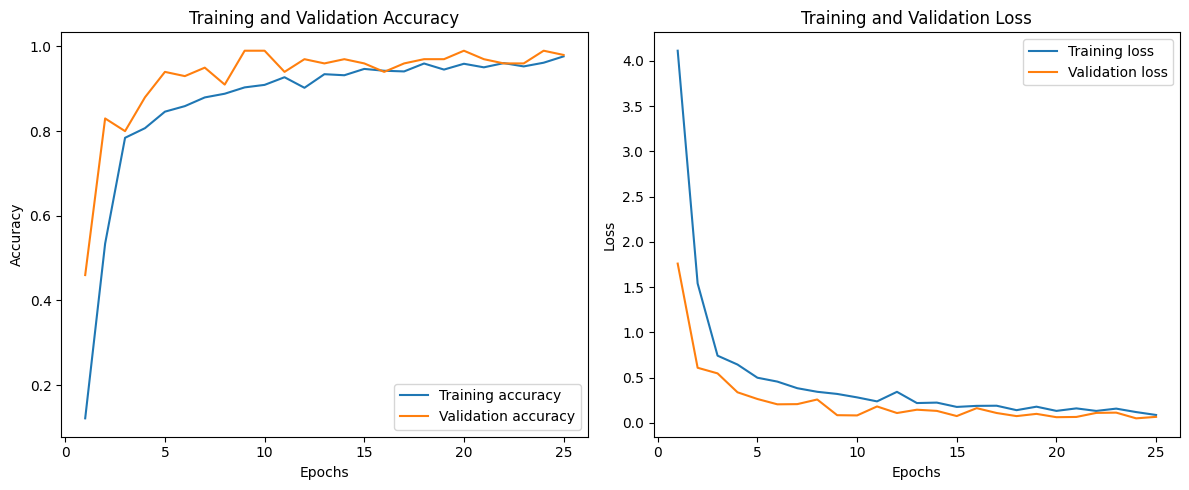

In [ ]:
# Extracting training and validation metrics from the history object
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_acc) + 1)

# Plotting accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

> Saving Model

In [ ]:
model.save('resnet50.keras')

# Performance on the test dataset

In [ ]:
predictions=model.evaluate(test_dg)

3/7 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 1.0000 - loss: 0.0726

W0000 00:00:1716998573.877777     132 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - accuracy: 1.0000 - loss: 0.0552 


In [ ]:

true_labels = test_dg.classes


predicted_labels = np.argmax(model.predict(test_dg), axis=1)

# Display classification report
print("Classification Report:\n", classification_report(true_labels, predicted_labels, target_names=test_dg.class_indices.keys()))

4/7 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step

W0000 00:00:1716998578.275933     132 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 649ms/step
Classification Report:
                             precision    recall  f1-score   support

           ABBOTTS BABBLER       1.00      1.00      1.00         5
             ABBOTTS BOOBY       1.00      1.00      1.00         5
ABYSSINIAN GROUND HORNBILL       1.00      1.00      1.00         5
     AFRICAN CROWNED CRANE       1.00      1.00      1.00         5
    AFRICAN EMERALD CUCKOO       1.00      1.00      1.00         5
         AFRICAN FIREFINCH       1.00      1.00      1.00         5
    AFRICAN OYSTER CATCHER       1.00      1.00      1.00         5
     AFRICAN PIED HORNBILL       1.00      1.00      1.00         5
       AFRICAN PYGMY GOOSE       1.00      1.00      1.00         5
                 ALBATROSS       1.00      1.00      1.00         5
            ALBERTS TOWHEE       1.00      1.00      1.00         5
      ALEXANDRINE PARAKEET       1.00      1.00      1.00         5
             ALPINE CHOUGH       1.00      1.00     

W0000 00:00:1716998582.168445     130 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


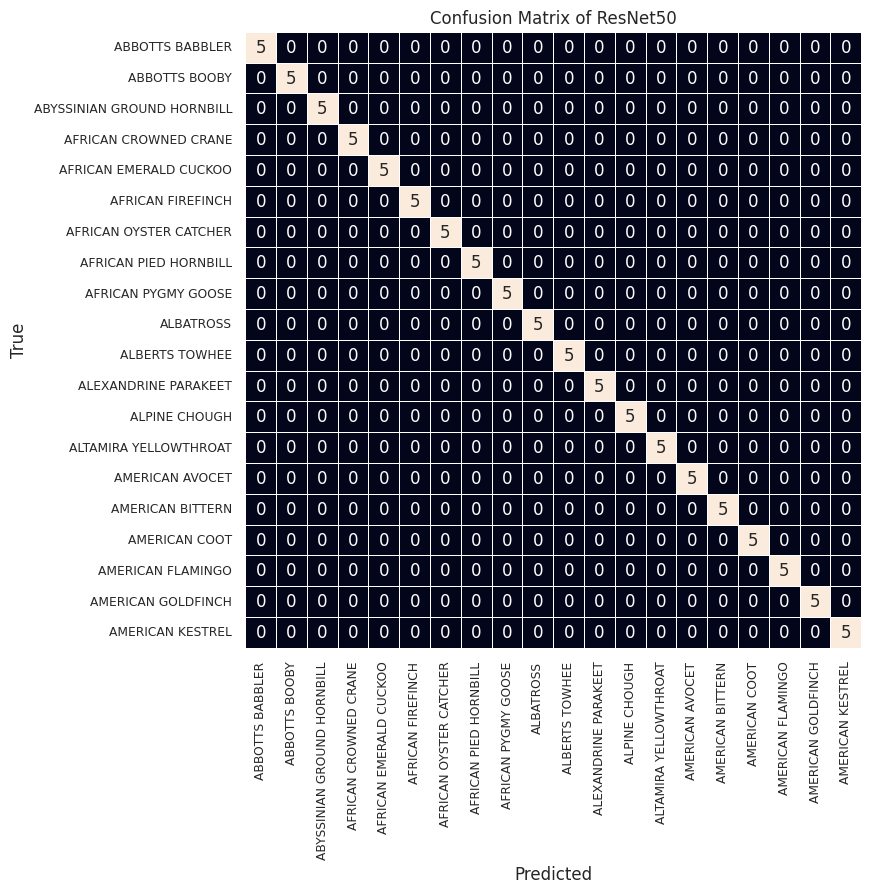

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(true_labels, predicted_labels)

sns.set(font_scale=0.8)


plt.figure(figsize=(10, 8))

sns.heatmap(conf_matrix, annot=True, fmt='d', cbar=False,
            linewidths=.5, square=True, annot_kws={"size": 12},
            xticklabels=list(test_dg.class_indices.keys()),
            yticklabels=list(test_dg.class_indices.keys()))

plt.title('Confusion Matrix of ResNet50', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

plt.grid(True, linestyle='--', alpha=1)


plt.show()

# DenseNet121 Model

In [ ]:
from tensorflow.keras.applications import DenseNet121

base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
  layer.trainable = False

x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(20, activation='softmax')(x)

model = keras.Model(inputs=base_model.input, outputs=outputs)

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model.compile(optimizer='adam',
              loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [ ]:
history = model.fit(
      train_dg,
      epochs=25,
      validation_data = val_dg)

Epoch 1/25
  2/101 ━━━━━━━━━━━━━━━━━━━━ 10s 110ms/step - accuracy: 0.0000e+00 - loss: 20.6195  

W0000 00:00:1716998624.369571     132 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 556ms/step - accuracy: 0.0413 - loss: 10.6966

W0000 00:00:1716998690.243685     131 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


101/101 ━━━━━━━━━━━━━━━━━━━━ 115s 784ms/step - accuracy: 0.0416 - loss: 10.6752 - val_accuracy: 0.1600 - val_loss: 5.2434
Epoch 2/25


W0000 00:00:1716998702.863303     131 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


101/101 ━━━━━━━━━━━━━━━━━━━━ 45s 412ms/step - accuracy: 0.1320 - loss: 5.3640 - val_accuracy: 0.2200 - val_loss: 4.0253
Epoch 3/25
101/101 ━━━━━━━━━━━━━━━━━━━━ 45s 420ms/step - accuracy: 0.1825 - loss: 4.8282 - val_accuracy: 0.2500 - val_loss: 3.7300
Epoch 4/25
101/101 ━━━━━━━━━━━━━━━━━━━━ 45s 418ms/step - accuracy: 0.2904 - loss: 3.5189 - val_accuracy: 0.2500 - val_loss: 3.8082
Epoch 5/25
101/101 ━━━━━━━━━━━━━━━━━━━━ 46s 420ms/step - accuracy: 0.2642 - loss: 3.9751 - val_accuracy: 0.4500 - val_loss: 2.5054
Epoch 6/25
101/101 ━━━━━━━━━━━━━━━━━━━━ 45s 417ms/step - accuracy: 0.3523 - loss: 2.8917 - val_accuracy: 0.4100 - val_loss: 2.8163
Epoch 7/25
101/101 ━━━━━━━━━━━━━━━━━━━━ 45s 416ms/step - accuracy: 0.4077 - loss: 2.5394 - val_accuracy: 0.3000 - val_loss: 3.1594
Epoch 8/25
101/101 ━━━━━━━━━━━━━━━━━━━━ 46s 421ms/step - accuracy: 0.3907 - loss: 2.8913 - val_accuracy: 0.4800 - val_loss: 1.9273
Epoch 9/25
101/101 ━━━━━━━━━━━━━━━━━━━━ 45s 416ms/step - accuracy: 0.4581 - loss: 2.4847 - val

# Accuracy and Loss DenseNet121

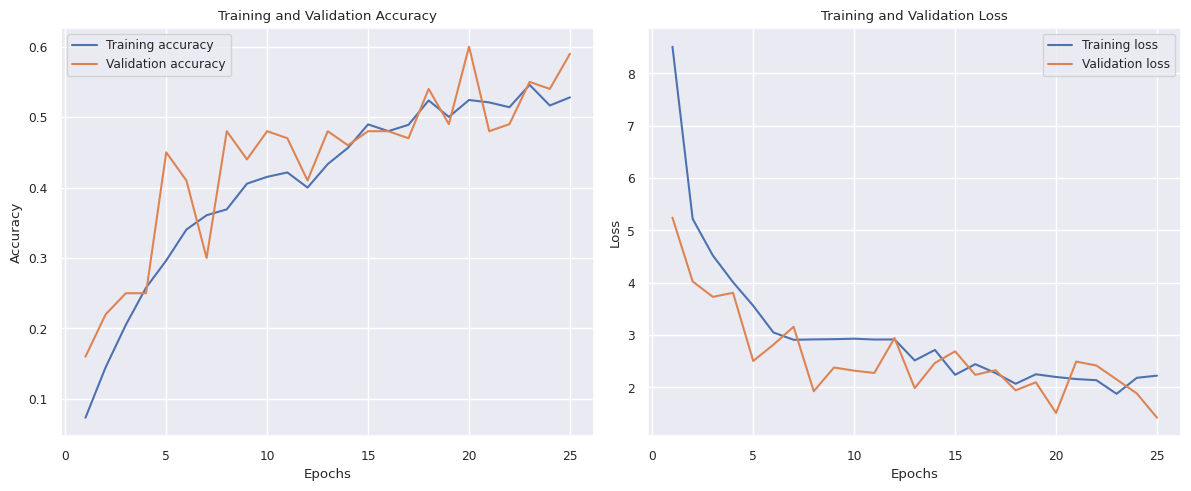

In [ ]:
# Extracting training and validation metrics from the history object
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_acc) + 1)

# Plotting accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

> Saving Model

In [ ]:
model.save('densenet121.keras')

# Performance on the test dataset

In [ ]:
predictions=model.evaluate(test_dg)

7/7 ━━━━━━━━━━━━━━━━━━━━ 16s 51ms/step - accuracy: 0.5093 - loss: 1.6311


In [ ]:
true_labels = test_dg.classes


predicted_labels = np.argmax(model.predict(test_dg), axis=1)

# Display classification report
print("Classification Report:\n", classification_report(true_labels, predicted_labels, target_names=test_dg.class_indices.keys()))

7/7 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step
Classification Report:
                             precision    recall  f1-score   support

           ABBOTTS BABBLER       0.00      0.00      0.00         5
             ABBOTTS BOOBY       1.00      0.20      0.33         5
ABYSSINIAN GROUND HORNBILL       0.40      0.40      0.40         5
     AFRICAN CROWNED CRANE       1.00      0.80      0.89         5
    AFRICAN EMERALD CUCKOO       0.80      0.80      0.80         5
         AFRICAN FIREFINCH       1.00      0.40      0.57         5
    AFRICAN OYSTER CATCHER       0.75      0.60      0.67         5
     AFRICAN PIED HORNBILL       0.50      0.60      0.55         5
       AFRICAN PYGMY GOOSE       0.45      1.00      0.62         5
                 ALBATROSS       0.38      1.00      0.56         5
            ALBERTS TOWHEE       1.00      0.40      0.57         5
      ALEXANDRINE PARAKEET       0.50      0.20      0.29         5
             ALPINE CHOUGH       1.00      0.40      0

W0000 00:00:1716999830.333482     129 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


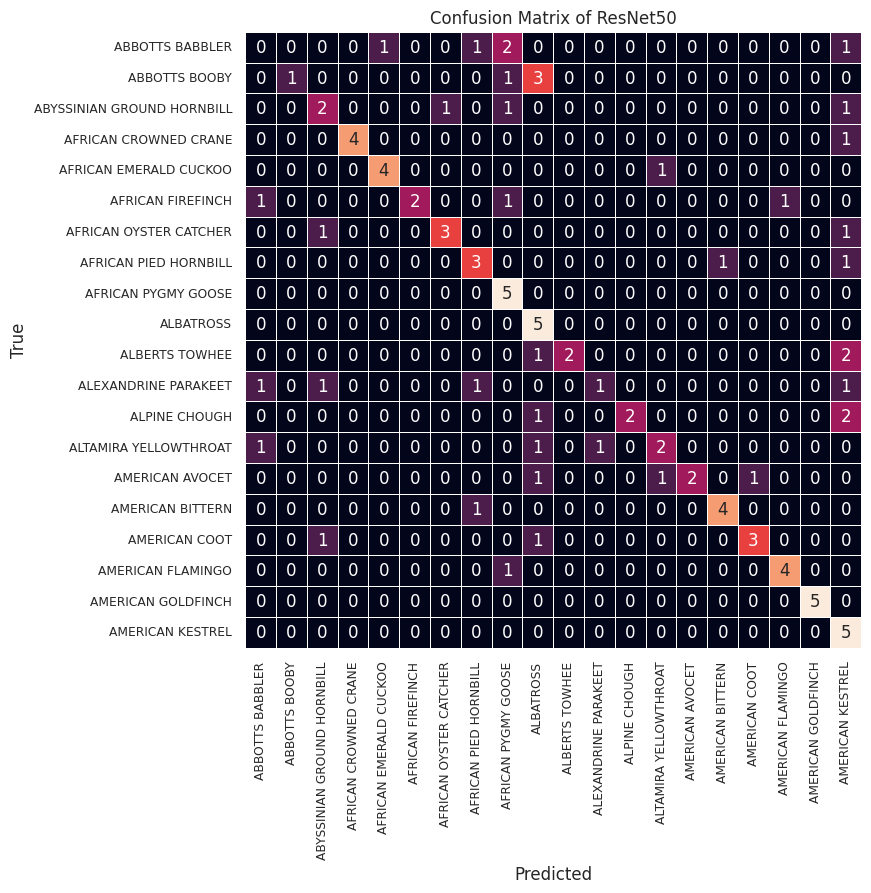

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(true_labels, predicted_labels)

sns.set(font_scale=0.8)


plt.figure(figsize=(10, 8))

sns.heatmap(conf_matrix, annot=True, fmt='d', cbar=False,
            linewidths=.5, square=True, annot_kws={"size": 12},
            xticklabels=list(test_dg.class_indices.keys()),
            yticklabels=list(test_dg.class_indices.keys()))

plt.title('Confusion Matrix of DenseNet121', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

plt.grid(True, linestyle='--', alpha=1)


plt.show()

# MobileNetV2

In [ ]:
from tensorflow.keras.applications import MobileNetV2

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
  layer.trainable = False

x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(20, activation='softmax')(x)

model = keras.Model(inputs=base_model.input, outputs=outputs)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model.compile(optimizer='adam',
              loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [ ]:
history = model.fit(
      train_dg,
      epochs=25,
      validation_data = val_dg)

Epoch 1/25
  1/101 ━━━━━━━━━━━━━━━━━━━━ 25:09 15s/step - accuracy: 0.0000e+00 - loss: 3.5914

W0000 00:00:1716999848.814369     129 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 85/101 ━━━━━━━━━━━━━━━━━━━━ 7s 473ms/step - accuracy: 0.0402 - loss: 4.6452

W0000 00:00:1716999888.520147     132 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


100/101 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step - accuracy: 0.0405 - loss: 4.5672

W0000 00:00:1716999896.875096     129 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


101/101 ━━━━━━━━━━━━━━━━━━━━ 67s 521ms/step - accuracy: 0.0404 - loss: 4.5576 - val_accuracy: 0.0600 - val_loss: 3.1649
Epoch 2/25


W0000 00:00:1716999900.886815     132 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


101/101 ━━━━━━━━━━━━━━━━━━━━ 44s 407ms/step - accuracy: 0.0653 - loss: 3.1966 - val_accuracy: 0.1400 - val_loss: 3.1156
Epoch 3/25
101/101 ━━━━━━━━━━━━━━━━━━━━ 44s 407ms/step - accuracy: 0.1205 - loss: 2.9487 - val_accuracy: 0.1600 - val_loss: 2.7077
Epoch 4/25
101/101 ━━━━━━━━━━━━━━━━━━━━ 44s 407ms/step - accuracy: 0.1625 - loss: 2.8247 - val_accuracy: 0.2100 - val_loss: 2.5699
Epoch 5/25
101/101 ━━━━━━━━━━━━━━━━━━━━ 45s 411ms/step - accuracy: 0.2262 - loss: 2.6295 - val_accuracy: 0.1700 - val_loss: 2.7478
Epoch 6/25
101/101 ━━━━━━━━━━━━━━━━━━━━ 44s 406ms/step - accuracy: 0.2444 - loss: 2.5831 - val_accuracy: 0.2200 - val_loss: 2.6648
Epoch 7/25
101/101 ━━━━━━━━━━━━━━━━━━━━ 45s 413ms/step - accuracy: 0.2493 - loss: 2.5160 - val_accuracy: 0.1700 - val_loss: 2.8567
Epoch 8/25
101/101 ━━━━━━━━━━━━━━━━━━━━ 44s 407ms/step - accuracy: 0.2616 - loss: 2.4672 - val_accuracy: 0.3000 - val_loss: 2.4852
Epoch 9/25
101/101 ━━━━━━━━━━━━━━━━━━━━ 44s 409ms/step - accuracy: 0.2549 - loss: 2.4145 - val

# Accuracy and Loss MobileNetV2

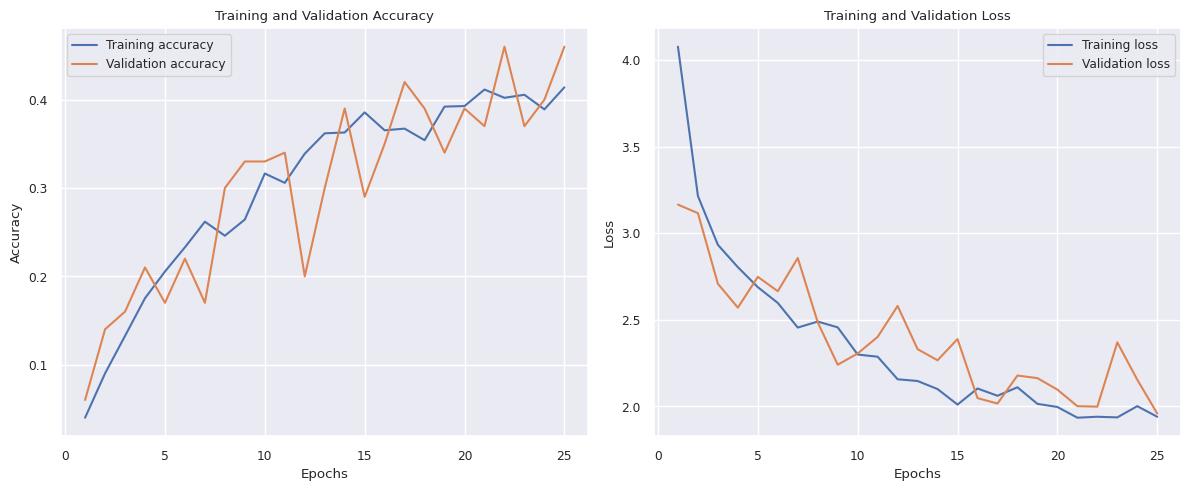

In [ ]:
# Extracting training and validation metrics from the history object
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_acc) + 1)

# Plotting accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

> Saving Model

In [ ]:
model.save('mobilenetv2.keras')

# Performance on the test dataset

In [ ]:
predictions=model.evaluate(test_dg)

4/7 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.3503 - loss: 1.8393

W0000 00:00:1717000978.733528     132 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.4220 - loss: 1.8222


In [ ]:
true_labels = test_dg.classes


predicted_labels = np.argmax(model.predict(test_dg), axis=1)

# Display classification report
print("Classification Report:\n", classification_report(true_labels, predicted_labels, target_names=test_dg.class_indices.keys()))

6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step

W0000 00:00:1717000982.172223     130 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 532ms/step
Classification Report:
                             precision    recall  f1-score   support

           ABBOTTS BABBLER       0.00      0.00      0.00         5
             ABBOTTS BOOBY       0.00      0.00      0.00         5
ABYSSINIAN GROUND HORNBILL       0.40      0.40      0.40         5
     AFRICAN CROWNED CRANE       0.62      1.00      0.77         5
    AFRICAN EMERALD CUCKOO       1.00      0.20      0.33         5
         AFRICAN FIREFINCH       0.00      0.00      0.00         5
    AFRICAN OYSTER CATCHER       0.50      0.80      0.62         5
     AFRICAN PIED HORNBILL       1.00      0.40      0.57         5
       AFRICAN PYGMY GOOSE       0.50      0.60      0.55         5
                 ALBATROSS       0.62      1.00      0.77         5
            ALBERTS TOWHEE       0.80      0.80      0.80         5
      ALEXANDRINE PARAKEET       0.33      0.80      0.47         5
             ALPINE CHOUGH       1.00      0.20     

W0000 00:00:1717000985.362569     130 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beha

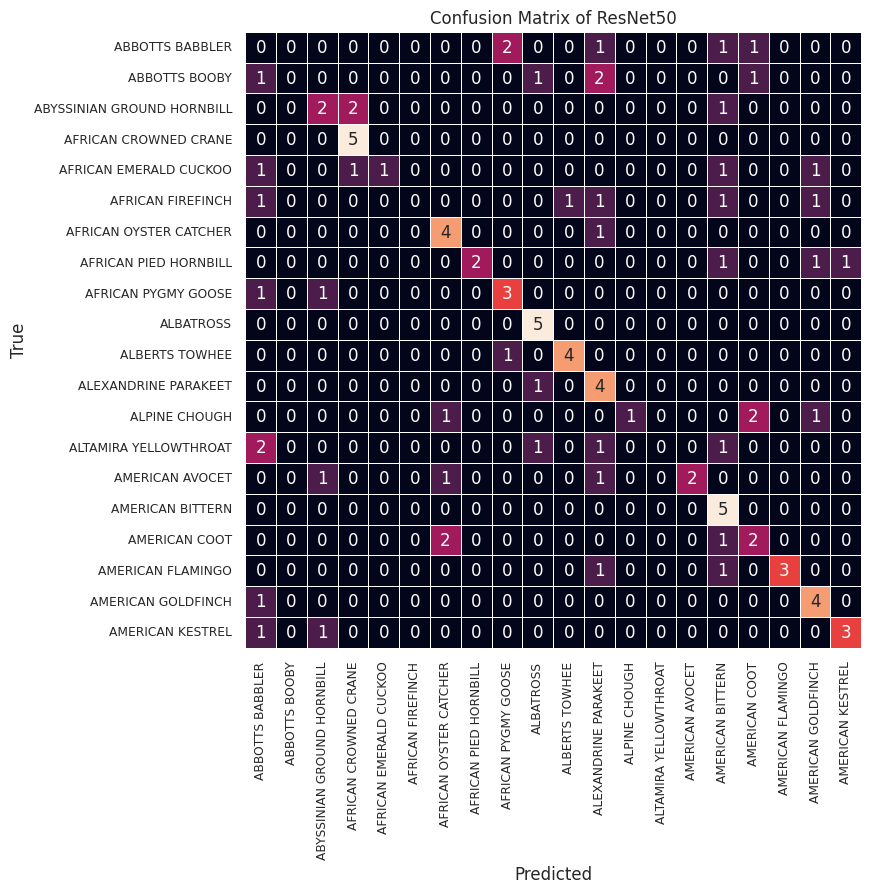

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(true_labels, predicted_labels)

sns.set(font_scale=0.8)


plt.figure(figsize=(10, 8))

sns.heatmap(conf_matrix, annot=True, fmt='d', cbar=False,
            linewidths=.5, square=True, annot_kws={"size": 12},
            xticklabels=list(test_dg.class_indices.keys()),
            yticklabels=list(test_dg.class_indices.keys()))

plt.title('Confusion Matrix of MobileNetV2', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

plt.grid(True, linestyle='--', alpha=1)


plt.show()